In [1]:
# install.packages("easypackages")
# install.packages(c('forecast', 'vars', 'tsDyn', 'tidyverse', 'readxl'))
library(easypackages)
requirements = c('forecast', 'vars', 'tsDyn', 'tidyverse', 'readxl')
suppressMessages(libraries(requirements))

In [21]:
months <- c('ม.ค.'=1, 'ก.พ.'=2, 'มี.ค.'=3, 'เม.ย.'=4, 'พ.ค.'=5, 'มิ.ย.'=6, 
            'ก.ค.'=7, 'ส.ค.'=8, 'ก.ย.'=9, 'ต.ค.'=10, 'พ.ย.'=11, 'ธ.ค.'=12)

read_farmgate <- function(root, filename){
    path <- paste0(root, filename)
    sheets <- excel_sheets(path)
    data <- data.frame()
    
    for (i in sheets){
        dt <-
            read_excel(path, skip=3, sheet=paste(i), na = c("-","")) %>%
            gather(key='month_th', value='values', -1) %>%
            filter(month_th %in% names(months)) %>%
            mutate(year = as.numeric(i) - 543) %>%
            mutate(month = months[month_th]) %>%
            mutate(date = as.Date(paste("1", as.character(month), as.character(year), sep="/"),format='%d/%m/%Y'))
        data <- bind_rows(data, dt)
    }
    names(data)[1] <- 'place'
    return(data)
}

# unique(rhfg$province)
root <- "../data/rice/farmgate/"
rhfg <- read_farmgate(root, "rhfg.xlsx") %>% mutate(pcode = 'RHFG')
rwfg <- read_farmgate(root, "rwfg.xlsx") %>% mutate(pcode = 'RWFG')
rgfg <- read_farmgate(root, "rgfg.xlsx") %>% mutate(pcode = 'RGFG')
head(rhfg)

,place,month_th,values,year,month,date,pcode
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1,เฉลี่ยทั้งประเทศ,ม.ค.,4237,1989,1,1989-01-01,RHFG
2,ภาคเหนือ,ม.ค.,4237,1989,1,1989-01-01,RHFG
3,ภาคตะวันออกเฉียงเหนือ,ม.ค.,NA,1989,1,1989-01-01,RHFG
4,ภาคกลาง,ม.ค.,4281,1989,1,1989-01-01,RHFG
5,เพชรบูรณ์,ม.ค.,NA,1989,1,1989-01-01,RHFG
6,สุโขทัย,ม.ค.,NA,1989,1,1989-01-01,RHFG


In [22]:
rice_fg <- bind_rows(rhfg, rwfg, rgfg)

In [23]:
rice_fg

place,month_th,values,year,month,date,pcode
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<chr>
เฉลี่ยทั้งประเทศ,ม.ค.,4237,1989,1,1989-01-01,RHFG
ภาคเหนือ,ม.ค.,4237,1989,1,1989-01-01,RHFG
ภาคตะวันออกเฉียงเหนือ,ม.ค.,NA,1989,1,1989-01-01,RHFG
ภาคกลาง,ม.ค.,4281,1989,1,1989-01-01,RHFG
เพชรบูรณ์,ม.ค.,NA,1989,1,1989-01-01,RHFG
สุโขทัย,ม.ค.,NA,1989,1,1989-01-01,RHFG
เชียงใหม่,ม.ค.,4250,1989,1,1989-01-01,RHFG
ลำพูน,ม.ค.,4183,1989,1,1989-01-01,RHFG
ขอนแก่น,ม.ค.,NA,1989,1,1989-01-01,RHFG


Warning message:
"Removed 22 rows containing missing values (geom_path)."


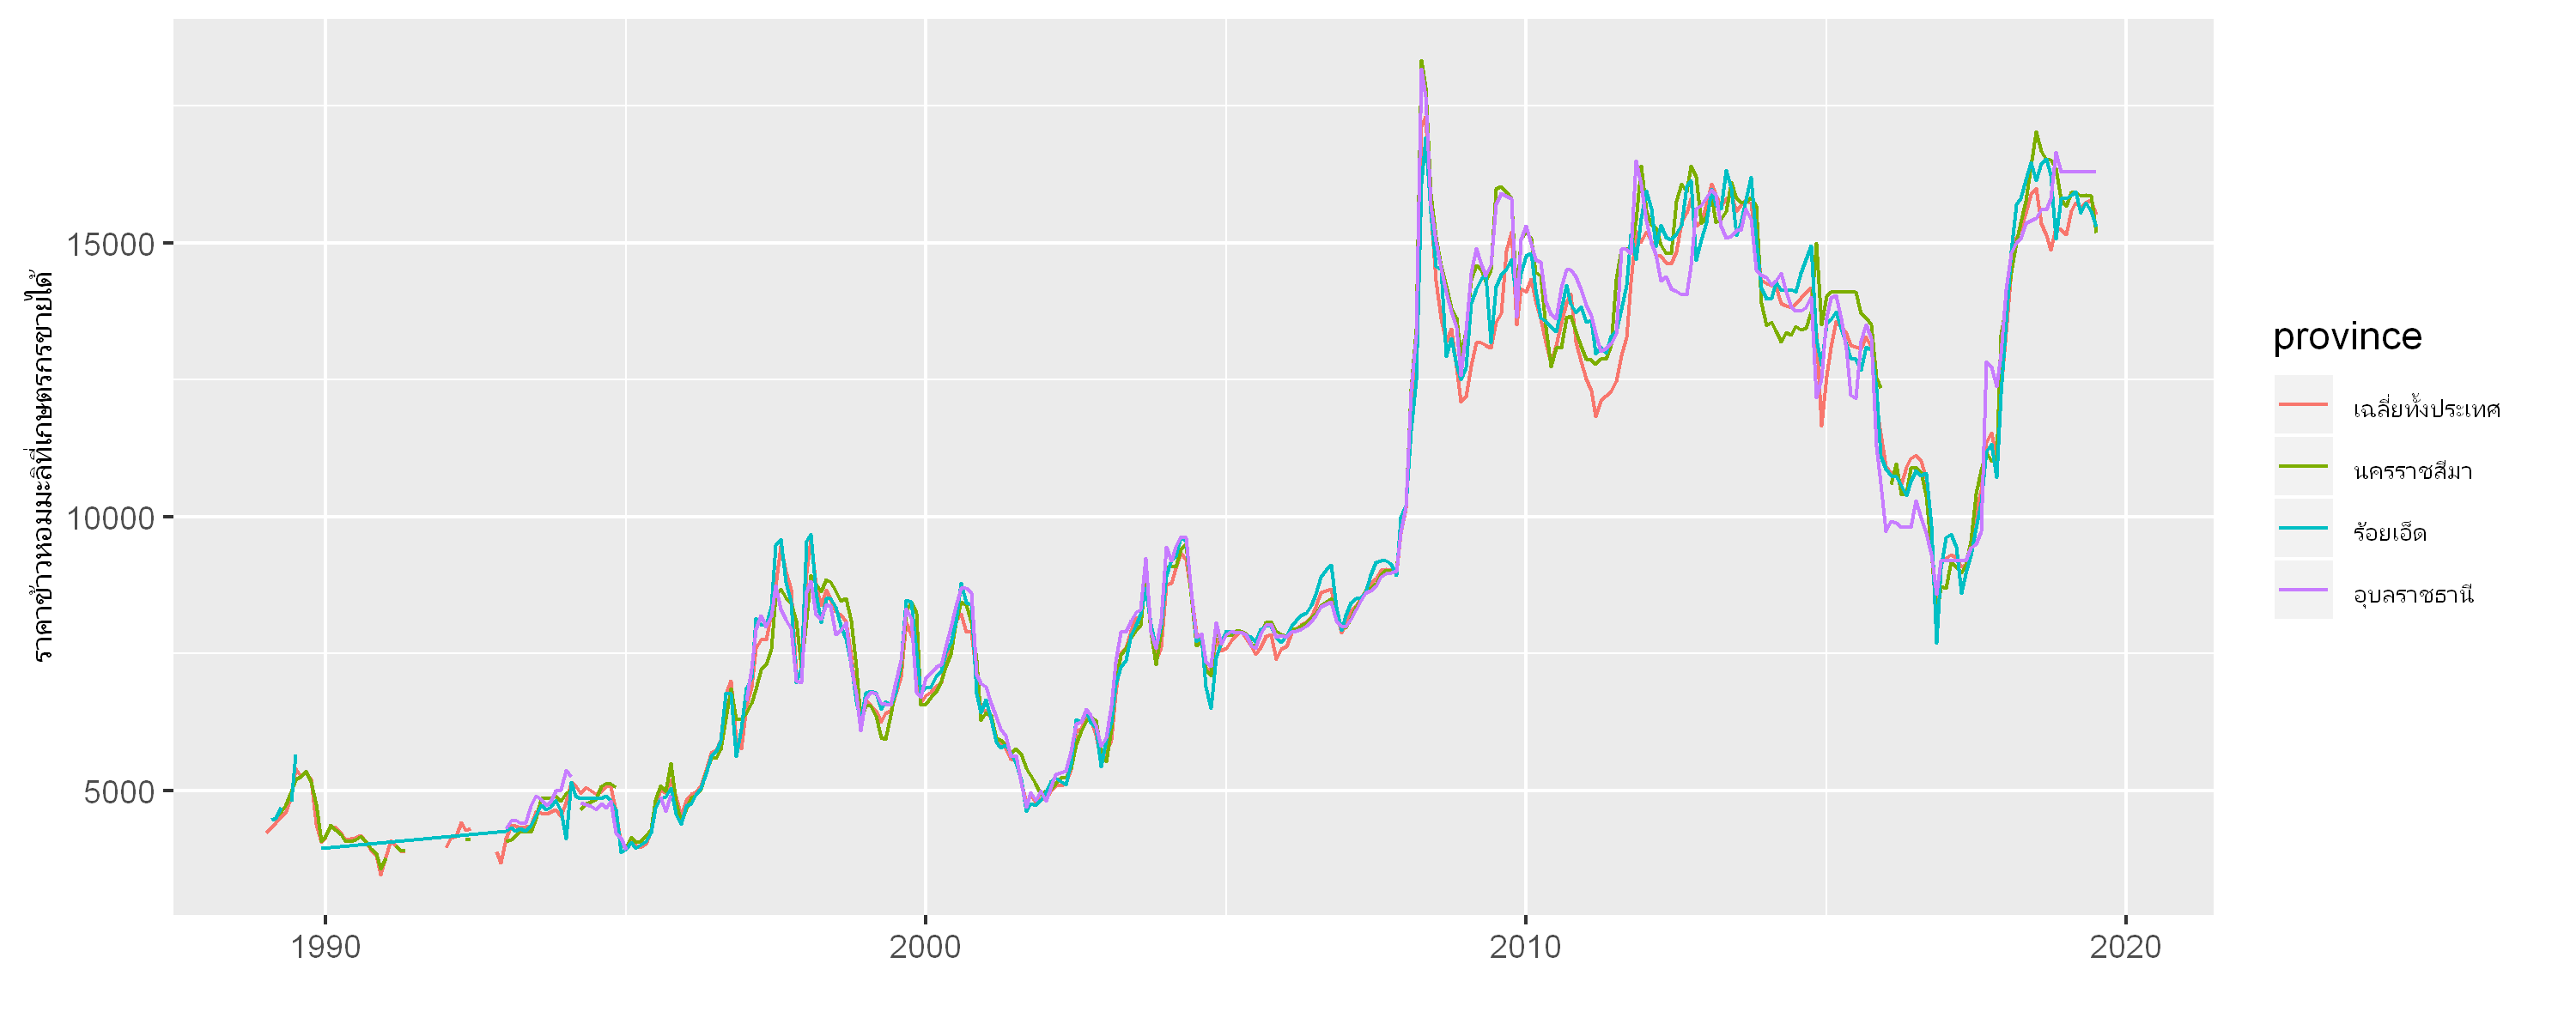

In [15]:
library(repr)
library(ggplot2)

options(repr.plot.width=10, repr.plot.height=4,repr.plot.res=300)
ggplot(rhfg %>% filter(province %in% c('อุบลราชธานี', 'นครราชสีมา', 'ร้อยเอ็ด', 'เฉลี่ยทั้งประเทศ')),
    aes(date, values, colour=province)) +
    geom_line() + xlab("") + ylab("ราคาข้าวหอมมะลิที่เกษตรกรขายได้")